In [1]:
from music21 import *

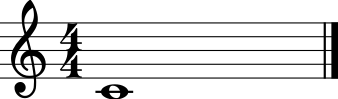

In [2]:
c = note.Note('C4', quarterLength=4)
c.show()

In [3]:
c.show('midi')

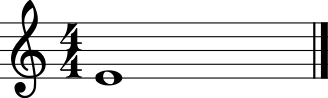

In [4]:
e = c.transpose('M3')
e.show()

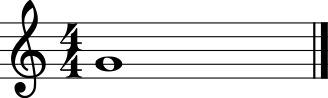

In [5]:
g = e.transpose('m3')
g.show()

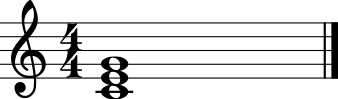

In [6]:
c_dur = chord.Chord([c, e, g])
c_dur.show()

In [7]:
c_dur.show('midi')

In [8]:
from enum import Enum
class MajorMinor(Enum):
    MAJOR = 1
    MINOR = 0

In [9]:
def build_chord(base_tone: note.Note, major_minor: MajorMinor = MajorMinor.MAJOR):
    intervals = ('M3', 'm3') if major_minor == MajorMinor.MAJOR else ('m3', 'M3')
    second_tone = base_tone.transpose(intervals[0])
    third_tone = second_tone.transpose(intervals[1])
    return chord.Chord([base_tone, second_tone, third_tone])

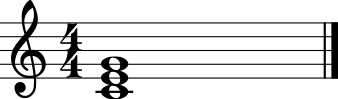

In [10]:
c_dur = build_chord(c, MajorMinor.MAJOR)
c_dur.show()

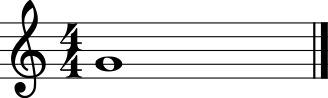

In [11]:
g = c.transpose('P5')
g.show()

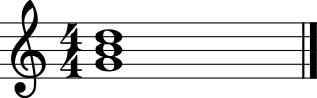

In [12]:
g_dur = build_chord(g, MajorMinor.MAJOR)
g_dur.show()

In [13]:
stream.Stream([c_dur, g_dur]).show('midi')

5


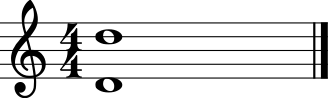

In [14]:
d2 = g.transpose('P5')
print(d2.octave)
d1 = note.Note('D4', quarterLength=4)
chord.Chord([d1, d2]).show()

In [15]:
def transpose_to_fourth_octave(note: note.Note):
    while note.octave > 4:
        note = note.transpose('P-8')
    while note.octave < 4:
        note = note.transpose('P8')
    return note

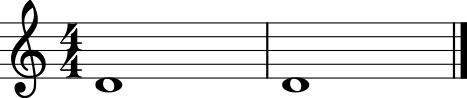

In [16]:
stream.Stream([d1, transpose_to_fourth_octave(d2)]).show()

In [17]:
from random import choice
def create_random_chord_stream(length):
    directions = [(MajorMinor.MAJOR, 'P-5'), (MajorMinor.MINOR, 'P-5'), 
                  (MajorMinor.MAJOR, 0), (MajorMinor.MINOR, 0), 
                  (MajorMinor.MAJOR, 'P5'), (MajorMinor.MINOR, 'P5')]
    major_minor = choice((MajorMinor.MAJOR, MajorMinor.MINOR))
    last_chord = build_chord(note.Note('C4', quarterLength=2), major_minor)
    s = stream.Stream()
    for i in range(length):
        changing_directions = directions.copy()
        changing_directions.pop(directions.index((major_minor, 0)))
        direction = choice(changing_directions)
        print(direction)
        new_chord = build_chord(transpose_to_fourth_octave(
            last_chord.notes[0].transpose(direction[1])), direction[0])
        s.append(new_chord)
        last_chord = new_chord
        major_minor = direction[0]
    return s

(<MajorMinor.MINOR: 0>, 'P5')
(<MajorMinor.MAJOR: 1>, 'P-5')
(<MajorMinor.MINOR: 0>, 'P5')
(<MajorMinor.MINOR: 0>, 'P-5')
(<MajorMinor.MINOR: 0>, 'P5')
(<MajorMinor.MINOR: 0>, 'P5')
(<MajorMinor.MAJOR: 1>, 'P-5')
(<MajorMinor.MAJOR: 1>, 'P-5')
(<MajorMinor.MAJOR: 1>, 'P5')
(<MajorMinor.MINOR: 0>, 0)
(<MajorMinor.MINOR: 0>, 'P-5')
(<MajorMinor.MAJOR: 1>, 'P-5')
(<MajorMinor.MINOR: 0>, 'P-5')
(<MajorMinor.MINOR: 0>, 'P5')
(<MajorMinor.MINOR: 0>, 'P-5')
(<MajorMinor.MAJOR: 1>, 'P-5')


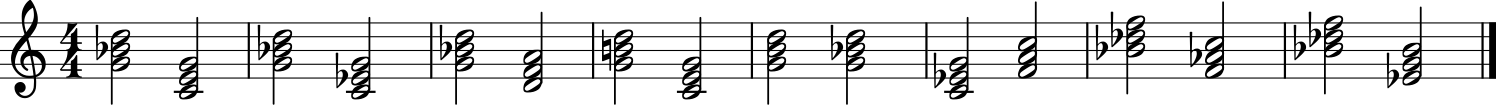

In [18]:
chord_stream = create_random_chord_stream(16)
chord_stream.show()

In [19]:
chord_stream.show('midi')